In [1]:
%run src/stability_plots
import numpy as np

In [2]:
import numba
numba.__version__

'0.42.0'

In [3]:
%run src/ssy_monte_carlo_test.py

In [49]:
G = 12  # Grid size

In [50]:
ssy = SSY()

A quick test of the functionality:

In [51]:
f = ssy_function_factory(ssy, parallelization_flag=False)


In [52]:
f(n=20, m=20)

1.0000282980219404

In [53]:
f(n=20, m=20)

1.0000282980219404

Remember original values

In [54]:
dot_loc = ssy.ψ, ssy.μ_c

In [55]:
psi_vec = np.linspace(1.1, 4.0, G)
mu_vec = np.linspace(0.0005, 0.003, G)

R = np.empty((G, G))

In [56]:
for i, ψ in enumerate(psi_vec):
    for j, μ_c in enumerate(mu_vec):
        ssy.ψ = ψ
        ssy.μ_c = μ_c
        test_function = ssy_function_factory(ssy, parallelization_flag=False)
        R[i, j] = test_function()

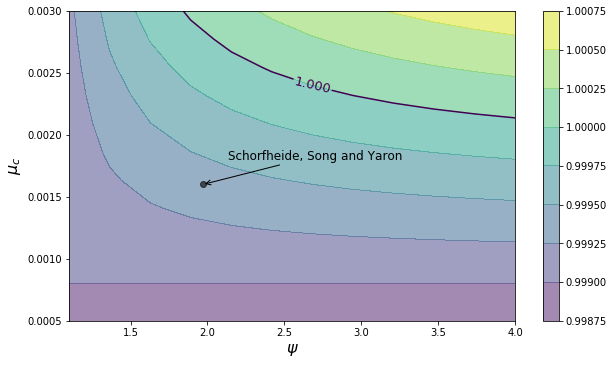

In [57]:
stability_plot(R, 
               psi_vec, mu_vec, 
                "$\psi$", "$\mu_c$", 
                txt_flag='ssy',
                dot_loc=dot_loc,
                coords=(25, 25))

Now let's look at a different set of parameters:

In [29]:
beta_vec = np.linspace(0.997, 0.9999, G)
psi_vec = np.linspace(1.25, 3.5, G)

In [30]:
ssy = SSY()
dot_loc = ssy.β, ssy.ψ

In [31]:
for i, β in enumerate(beta_vec):
    for j, ψ in enumerate(psi_vec):
        ssy.ψ = ψ
        ssy.β = β
        test_function = ssy_function_factory(ssy, parallelization_flag=False)
        R[i, j] = test_function()

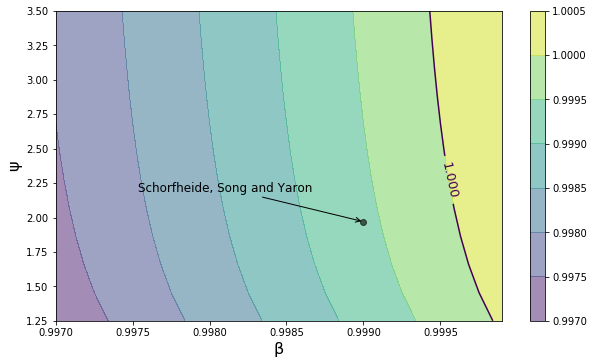

In [32]:
stability_plot(R, 
               beta_vec, psi_vec, 
               "β", "ψ", 
               txt_flag='ssy',
               dot_loc=dot_loc)